# DH - Data Science - Grupo 6.

Integrantes:

*    José Roberto Canales Delgado
*    Matías Sala
*    Luciana Sande
*    Bianca Somadossi

# Desafío 2: Construir un Modelo de Regresión.

Objetivo: desarrollar un modelo de regresión que permita predecir el precio por metro cuadrado de una propiedad.

In [2]:
# initial setup
%run "common/0_notebooks_base_setup.py"

C:\Users\salam\Desktop\Data Science\TP\DH_grupo_6common
default checking
Running command `conda list`... ok
Running command `conda install --yes jupyterlab=2.2.6`... ok
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\salam\anaconda3\envs\dhdsblend2021

  added / updated specs:
    - jupyterlab=2.2.6


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    jupyterlab-2.2.6           |     pyhd3eb1b0_1         3.4 MB
    jupyterlab_server-1.2.0    |             py_0          25 KB
    ------------------------------------------------------------
                                           Total:         3.4 MB

The following packages will be DOWNGRADED:

  jupyterlab                             3.2.1-pyhd3eb1b0_1 --> 2.2.6-pyhd3eb1b0_1
  jupyterlab_server 

In [35]:
#importamos de todas las librerías que vamos a utilizar

import numpy as np
import pandas as pd
import re
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import cufflinks as cf
import math

%matplotlib inline 
#muestra los gráficos debajo de la celda de código ejecutada

In [36]:
pd.options.display.float_format='{:,.2f}'.format

In [37]:
#Importaremos el dataset trabajado en el Desafío 1, creando un Dataframe.

data_location = "Data/properati_final.csv"

dataset = pd.read_csv(data_location, sep=",", encoding="UTF-8")


In [38]:
dataset.shape

(46762, 40)

In [39]:
dataset.columns

Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail', 'parrilla', 'quincho', 'patio', 'balcon', 'pileta',
       'cochera', 'amenities', 'ciudad', 'barrio', 'count', 'median',
       'precio_m2', 'precio_imp', 'segmento_precio_m2'],
      dtype='object')

In [40]:
dataset["property_type"].unique()




array(['PH', 'apartment', 'house', 'store'], dtype=object)

In [29]:
index_property_types=dataset[dataset["property_type"] == "store"].index

In [31]:
dataset.drop(index_property_types, inplace=True)

In [33]:
dataset.shape

(45476, 40)

In [34]:
dataset["property_type"].unique()


array(['PH', 'apartment', 'house'], dtype=object)

Text(0.5, 1.0, 'Casas')

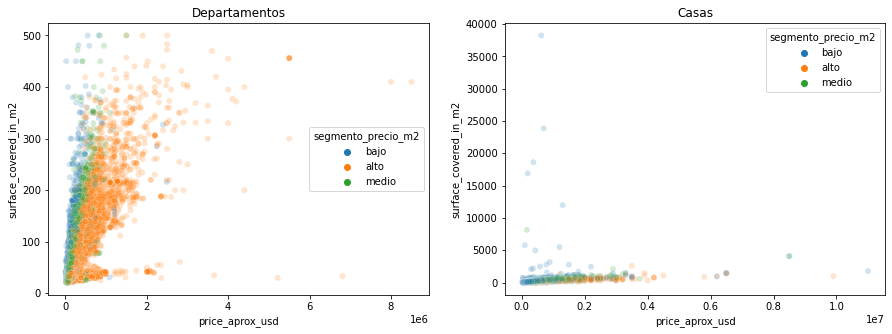

In [44]:
fig, axs = plt.subplots(1,2, figsize=(15, 5))

sns.scatterplot(x=((dataset[(dataset.property_type == 'apartment')].price_aprox_usd)), 
                y=(dataset[(dataset.property_type == 'apartment')].surface_covered_in_m2 ), 
                alpha=0.2, ax=axs[0], hue=dataset['segmento_precio_m2'])


axs[0].set_title("Departamentos")

sns.scatterplot(x=((dataset[(dataset.property_type == 'house')].price_aprox_usd)), 
                y=(dataset[(dataset.property_type == 'house')].surface_covered_in_m2 ), 
                alpha=0.2, ax=axs[1], hue=dataset['segmento_precio_m2'])


axs[1].set_title("Casas")



In [53]:
index_outliers=dataset[dataset["surface_covered_in_m2"] > 2000].index

In [54]:
index_outliers

Int64Index([ 2841,  3440,  5816,  7310, 11585, 13477, 13870, 15865, 17456,
            19561, 22353, 23978, 23991, 27219, 27240, 27275, 27895, 27933,
            27939, 27942, 27949, 27969, 28016, 28122, 28233, 28238, 29413,
            30334, 33912, 34062, 34515, 35178, 36239, 39097, 39709],
           dtype='int64')

In [55]:
dataset.drop(index_outliers, inplace=True)

Text(0.5, 1.0, 'Casas')

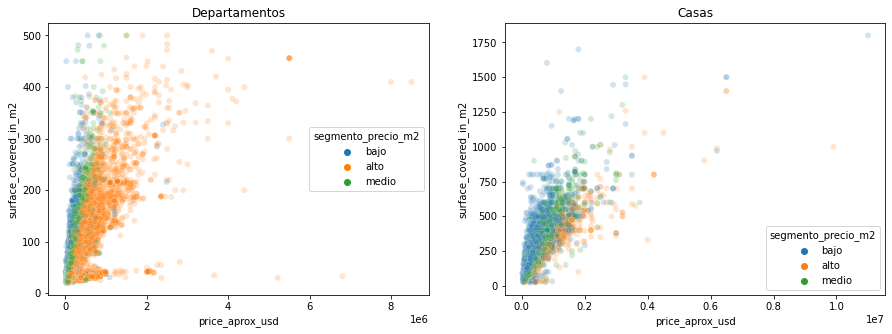

In [56]:
fig, axs = plt.subplots(1,2, figsize=(15, 5))

sns.scatterplot(x=((dataset[(dataset.property_type == 'apartment')].price_aprox_usd)), 
                y=(dataset[(dataset.property_type == 'apartment')].surface_covered_in_m2 ), 
                alpha=0.2, ax=axs[0], hue=dataset['segmento_precio_m2'])


axs[0].set_title("Departamentos")

sns.scatterplot(x=((dataset[(dataset.property_type == 'house')].price_aprox_usd)), 
                y=(dataset[(dataset.property_type == 'house')].surface_covered_in_m2 ), 
                alpha=0.2, ax=axs[1], hue=dataset['segmento_precio_m2'])


axs[1].set_title("Casas")


In [59]:
dataset["price_aprox_usd"].sample(5)

29784   264,000.00
33426   130,000.00
25147   270,000.00
18345   222,458.00
23043   375,000.00
Name: price_aprox_usd, dtype: float64

In [64]:
dataset["price_aprox_usd"]

0        62,000.00
1        72,000.00
2       130,000.00
3       138,000.00
4       195,000.00
           ...    
46757   165,000.00
46758   870,000.00
46759   498,000.00
46760   131,500.00
46761   129,000.00
Name: price_aprox_usd, Length: 46701, dtype: float64

In [96]:
dataset.sort_values('price_aprox_usd',ascending=False,inplace=True)


In [97]:
print(dataset["price_aprox_usd"].head(20))

228     11,000,000.00
22830    9,900,000.00
18053    8,500,000.00
18052    8,000,000.00
10330    6,809,000.00
15119    6,500,000.00
14001    6,500,000.00
19492    6,500,000.00
8065     6,500,000.00
4608     6,200,000.00
23684    6,200,000.00
18763    5,800,000.00
21519    5,500,000.00
23560    5,500,000.00
21580    5,500,000.00
21630    5,500,000.00
21518    5,500,000.00
18050    5,500,000.00
17542    5,500,000.00
9853     5,214,782.00
Name: price_aprox_usd, dtype: float64


In [98]:
dataset_index_outliers = dataset.loc[(dataset["price_aprox_usd"] <= 8000000)]

In [100]:
dataset_index_outliers

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,pileta,cochera,amenities,ciudad,barrio,count,median,precio_m2,precio_imp,segmento_precio_m2
18052,44684,sell,apartment,Palermo Chico,|Argentina|Capital Federal|Palermo|Palermo Chico|,Argentina,Capital Federal,nan,"-34.5789246,-58.4013987",-34.58,...,0,1,1,Palermo,Palermo Chico,nan,nan,"19,512.20","8,000,000.00",alto
10330,26637,sell,apartment,Boedo,|Argentina|Capital Federal|Boedo|,Argentina,Capital Federal,"3,436,003.00","-34.6222039,-58.416089",-34.62,...,1,0,2,Boedo,Boedo,770.00,"8,543.02","206,333.33","6,809,000.00",alto
15119,37659,sell,house,Nordelta,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nord...,Argentina,Bs.As. G.B.A. Zona Norte,nan,"-34.4465229,-58.6338743",-34.45,...,1,1,5,Tigre,Nordelta,nan,nan,"4,198.97","5,878,552.97",alto
14001,35005,sell,house,Beccar,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Argentina,Bs.As. G.B.A. Zona Norte,"3,436,080.00",NaN,nan,...,1,1,4,San Isidro,Beccar,266.00,"1,551.12","1,413.04","2,119,565.22",bajo
19492,47851,sell,house,Beccar,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Argentina,Bs.As. G.B.A. Zona Norte,"3,436,080.00",NaN,nan,...,1,1,5,San Isidro,Beccar,266.00,"1,551.12","1,413.04","2,119,565.22",bajo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43135,109919,sell,house,Ingeniero Adolfo Sourdeaux,|Argentina|Bs.As. G.B.A. Zona Norte|Malvinas A...,Argentina,Bs.As. G.B.A. Zona Norte,nan,"-34.4976342,-58.6608572",-34.50,...,0,0,0,Malvinas Argentinas,Ingeniero Adolfo Sourdeaux,nan,nan,25.88,"2,329.41",bajo
10468,26932,sell,apartment,Flores,|Argentina|Capital Federal|Flores|,Argentina,Capital Federal,"3,433,918.00","-34.6324508,-58.4706827",-34.63,...,0,0,0,Flores,Flores,963.00,"2,096.77",211.11,"8,866.67",bajo
10469,26933,sell,apartment,Floresta,|Argentina|Capital Federal|Floresta|,Argentina,Capital Federal,"3,433,910.00","-34.6324508,-58.4706827",-34.63,...,0,0,0,Floresta,Floresta,290.00,"1,743.22",211.11,"8,866.67",bajo
10467,26931,sell,apartment,Parque Avellaneda,|Argentina|Capital Federal|Parque Avellaneda|,Argentina,Capital Federal,nan,"-34.6324508,-58.4706827",-34.63,...,0,0,0,Parque Avellaneda,Parque Avellaneda,nan,nan,211.11,"8,866.67",bajo


Text(0.5, 1.0, 'Casas')

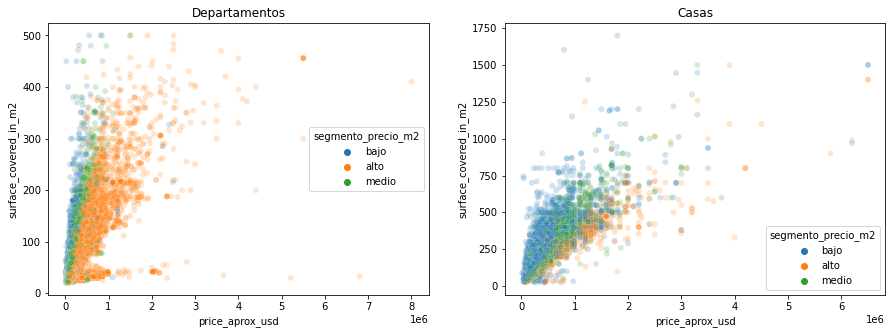

In [101]:
fig, axs = plt.subplots(1,2, figsize=(15, 5))

sns.scatterplot(x=((dataset_index_outliers[(dataset_index_outliers.property_type == 'apartment')].price_aprox_usd)), 
                y=(dataset_index_outliers[(dataset_index_outliers.property_type == 'apartment')].surface_covered_in_m2 ), 
                alpha=0.2, ax=axs[0], hue=dataset_index_outliers['segmento_precio_m2'])


axs[0].set_title("Departamentos")

sns.scatterplot(x=((dataset_index_outliers[(dataset_index_outliers.property_type == 'house')].price_aprox_usd)), 
                y=(dataset_index_outliers[(dataset_index_outliers.property_type == 'house')].surface_covered_in_m2 ), 
                alpha=0.2, ax=axs[1], hue=dataset_index_outliers['segmento_precio_m2'])


axs[1].set_title("Casas")